# Hygrogen Atom Problem - Analytical Solutions and Graphs - SKP

Here the solutions of the Hydrogen atom problem is given. Explore the solutions and graphs.

- I have defined the functions in the **Defining Function** [section](#defining-function). Here I have taken functions from `sympy.physics.hydrogen` and created numerical functions from them. The defined function, named **`hydrogen_wavefn_all`** gives the analytical and graphical view of total wavefunction $\psi_{nlm}(r, \theta, \phi)$ and radial wavefunction $R_{nl}(r)$ and **`hydrogen_wavefn_return`** returns 2 functions  **`phi_nlm_fn(r, theta, phi)`** and   **`R_nl_fn(r)`** for those wavefunctions. 

- In the **Give Inputs and Get States** [section](#give-inputs-and-get-states), you can give arbitary values of (n, l, m) and get the states. Here you need to set the number of grid points (`N1`) and the maximum limit of radius `r1` to view the total graphs. 

- Once you are done with the above things, go to the **Working with Functions** [section](#working-with-functions). Here I have used the returned functions (**`phi_nlm_fn(r, theta, phi)`** and   **`R_nl_fn(r)`**) and done few more plots from these.

- At last, in the **Effects of n, l and m** [section](#effects-of-n-l-and-m), the variations of n, l and m are shown. Here you can see how wavefunctions change (analytically and graphically) when n, l and m changes.

## Modules to import

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import sympy as sp
import sympy.physics.hydrogen as sphydrogen

In [2]:
import scipy.constants as const

| Constant                                   | Hartree Atomic Units | SI Units                                   |
|--------------------------------------------|-----------------------|--------------------------------------------|
| Atomic unit of length (bohr radius, $a₀$)   | 1                     | $0.52917721067$ Å              |
| Atomic unit of time ($\frac{\hbar}{E_h}$)   | 1                     | $1.054571817 \times 10^{-34}$ J·s         |
| Atomic unit of mass (electron rest mass, $mₑ$)| 1                    | $9.10938356 \times 10^{-31}$ kg           |
| Atomic unit of charge (elementary charge, $e$)| 1                    | $1.602176634 \times 10^{-19}$ C           |
| Fine-structure constant ($\alpha$)           | 1/137                 | $0.0072973525693$                         |
| Atomic unit of energy ($E_h$)               | 1                     | $4.3597447222071 \times 10^{-18}$ J       |

$E_h = 27.21138602 \,eV\, = 4.35974434 × 10^{-18} \, J$

## Defining Function

**cmap:** `'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'`

Selected: `'viridis', 'plasma', 'inferno', 'magma'`

### Function: **`hydrogen_wavefn_all`**

In [3]:
def hydrogen_wavefn_all(Z, n, l, m, r, theta, phi,
                    Psi_nlm=True, Psi_nlm2=True, R_nl=True, R_nl2=True):
    '''
    ------- Functions to import --------
    import numpy as np
    import matplotlib.pyplot as plt
    import sympy as sp
    import sympy.physics.hydrogen as sphydrogen
    -------- Inputs ---------
    Z: atomic number
    n: principal quantum number: 1,2,3,...
    l: azimuthal quantum number: 0,1,2,... (l<n-1)
    m: magnetic quantum number: ...,-2,-1,0,1,2,... (|m|<l)
    r: an numpy array: np.linspace(0,15,N)
    theta: numpy array: np.linspace(0, np.pi, N)
    phi: numpy array: np.linspace(0, 2*np.pi, N1)
    N = 50  # number of grid points for plotting
    Psi_nlm: True if you want to show the graph (default), False if you don't
    Psi_nlm2: True if you want to show the graph (default), False if you don't
    R_nl: True if you want to show the graph (default), False if you don't
    R_nl2: True if you want to show the graph (default), False if you don't
    ------- Outputs ----------
    value of energy of the state
    Analytical expression for Psi_nlm(r,theta,phi)
    Normalization check of Psi_nlm(r, theta, phi) (compare with 1)
    Contour plot for psi in (r*cos(psi), r*sin(phi)) plane
    Analytical expression for R_nl(r)
    Normalization check of R_nl(r) (compare with 1)
    Plot of r vs R_nl(r)
    '''
    print(f'\n\t Inputs: \t n={n}, l={l}, m={m}, \t Z={Z} \n')
    rsp = sp.Symbol('r', positive=True)
    phisp, thetasp = sp.symbols('phi theta', real=True)
    Zsp = sp.Symbol('Z', positive=True, integer=True, nonzero=True)
    psinlmsp, rnlsp = sp.symbols('\psi_{nlm} R_{nl}')

    EheV, EhJ = 27.21138602, 4.35974434e-18  # Energy in eV and J
    E_n = sphydrogen.E_nl(n, Z)
    print(f'E = {E_n} in Hartree atomic units = {EhJ*E_n} J = {EheV*E_n} eV')

    Psi_nlm_sp = sphydrogen.Psi_nlm(n, l, m, rsp, phisp, thetasp, Zsp)
    display(psinlmsp, Psi_nlm_sp, Psi_nlm_sp.simplify())
    print('normalization:', sp.integrate(sp.Abs(Psi_nlm_sp)**2*rsp**2*sp.sin(thetasp), 
                    (rsp,0,sp.oo),(thetasp,0,sp.pi),(phisp,0,2*sp.pi)))
    Psi_nlm_np = sp.lambdify((rsp,phisp,thetasp), sphydrogen.Psi_nlm(n,l,m,rsp,phisp,thetasp,Z))
    # R3, Theta3, Phi3 = np.meshgrid(r, theta, phi, indexing='ij')
    # psiarr3 = Psi_nlm_np(R3, Theta3, Phi3)
    R2, Phi2 = np.meshgrid(r, phi)
    Theta2 = np.full_like(R2, np.pi/2)  # input value of theta
    psiarr2 = Psi_nlm_np(R2, Theta2, Phi2)
    if Psi_nlm == True:
        plt.contourf(R2*np.cos(Phi2), R2*np.sin(Phi2), psiarr2, cmap='inferno')
        plt.colorbar(label='$\psi_{nlm}$')
        plt.title(f'State {n, l, m}, Z={Z}')
        plt.show()
    elif Psi_nlm == False:
        print(end='')
    if Psi_nlm2 == True:
        plt.contourf(R2*np.cos(Phi2), R2*np.sin(Phi2), np.abs(psiarr2)**2, cmap='magma')
        plt.colorbar(label='$|\psi_{nlm}|^2$')
        plt.title(f'State {n, l, m}, Z={Z}')
        plt.show()
    elif Psi_nlm2 == False:
        print(end='')

    R_nl_sp = sphydrogen.R_nl(n, l, rsp, Zsp)
    display(rnlsp, R_nl_sp, R_nl_sp.simplify())
    R_nl_np = sp.lambdify(rsp, sphydrogen.R_nl(n, l, rsp, Z))
    R_nl_plot = R_nl_np(r)/(np.sum(R_nl_np(r)**2*r**2*(r[1]-r[0])))**0.5
    print(f'normalization: {np.sum(R_nl_plot**2 *r**2 *(r[1]-r[0]))}')
    if R_nl == True:
        plt.plot(r, R_nl_plot)
        plt.axhline(0, color='yellow')
        plt.xlabel('$r$')
        plt.ylabel('$R_{nl}$', fontsize=12)
        plt.title(f'State {n, l}, Z={Z}')
        plt.grid()
        plt.show()
    elif R_nl == False:
        print(end='')
    if R_nl2 == True:
        plt.plot(r, R_nl_plot**2)
        plt.axhline(0, color='yellow')
        plt.xlabel('$r$')
        plt.ylabel('$|R_{nl}|^2$', fontsize=12)
        plt.title(f'State {n, l}, Z={Z}')
        plt.grid()
        plt.show()
    elif R_nl2 == False:
        print(end='')


In [4]:
print(hydrogen_wavefn_all.__doc__)


    ------- Functions to import --------
    import numpy as np
    import matplotlib.pyplot as plt
    import sympy as sp
    import sympy.physics.hydrogen as sphydrogen
    -------- Inputs ---------
    Z: atomic number
    n: principal quantum number: 1,2,3,...
    l: azimuthal quantum number: 0,1,2,... (l<n-1)
    m: magnetic quantum number: ...,-2,-1,0,1,2,... (|m|<l)
    r: an numpy array: np.linspace(0,15,N)
    theta: numpy array: np.linspace(0, np.pi, N)
    phi: numpy array: np.linspace(0, 2*np.pi, N1)
    N = 50  # number of grid points for plotting
    Psi_nlm: True if you want to show the graph (default), False if you don't
    Psi_nlm2: True if you want to show the graph (default), False if you don't
    R_nl: True if you want to show the graph (default), False if you don't
    R_nl2: True if you want to show the graph (default), False if you don't
    ------- Outputs ----------
    value of energy of the state
    Analytical expression for Psi_nlm(r,theta,phi)
    Norma

### Function: **`hydrogen_wavefn_return`**

In [5]:
def hydrogen_wavefn_return(Z, n, l, m):
    '''
    ------- Functions to import --------
    import numpy as np
    import sympy as sp
    import sympy.physics.hydrogen as sphydrogen
    -------- Inputs ---------
    Z: atomic number
    n: principal quantum number: 1,2,3,...
    l: azimuthal quantum number: 0,1,2,... (l<n-1)
    m: magnetic quantum number: ...,-2,-1,0,1,2,... (|m|<l)
    ------- Returns ----------
    np.array([E, E in J, E in eV]), psi_nlm(r,theta,phi), R_nl(r)
    '''
    rsp = sp.Symbol('r', positive=True)
    phisp, thetasp = sp.symbols('phi theta', real=True)

    EheV, EhJ = 27.21138602, 4.35974434e-18  # Energy in eV and J
    E_n = sphydrogen.E_nl(n, Z)
    E_n_J, E_n_eV = EhJ*E_n, EheV*E_n
    Psi_nlm_np = sp.lambdify((rsp,phisp,thetasp), sphydrogen.Psi_nlm(n,l,m,rsp,phisp,thetasp,Z))
    R_nl_np = sp.lambdify(rsp, sphydrogen.R_nl(n, l, rsp, Z))

    return np.array([E_n, E_n_J, E_n_eV]), Psi_nlm_np, R_nl_np

In [6]:
print(hydrogen_wavefn_return.__doc__)


    ------- Functions to import --------
    import numpy as np
    import sympy as sp
    import sympy.physics.hydrogen as sphydrogen
    -------- Inputs ---------
    Z: atomic number
    n: principal quantum number: 1,2,3,...
    l: azimuthal quantum number: 0,1,2,... (l<n-1)
    m: magnetic quantum number: ...,-2,-1,0,1,2,... (|m|<l)
    ------- Returns ----------
    np.array([E, E in J, E in eV]), psi_nlm(r,theta,phi), R_nl(r)
    


## Give Inputs and Get States


	 Inputs: 	 n=3, l=1, m=-1, 	 Z=1 

E = -1/18 in Hartree atomic units = -2.42208018888889E-19 J = -1.51174366777778 eV


\psi_{nlm}

Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-I*phi)*exp(-Z*r/3)*sin(theta)/(54*sqrt(pi))

Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3 - I*phi)*sin(theta)/(81*sqrt(pi))

normalization: 1


c:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


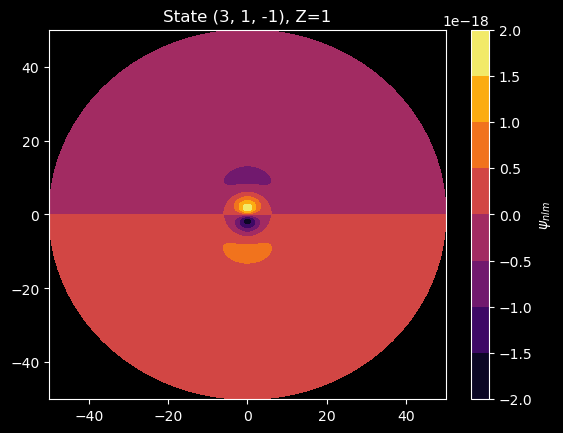

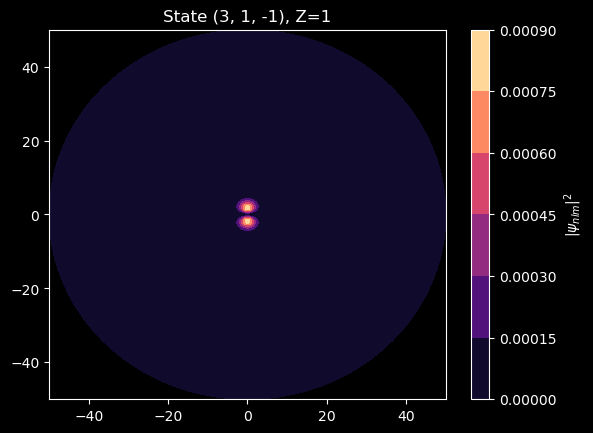

R_{nl}

sqrt(6)*Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-Z*r/3)/81

2*sqrt(6)*Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3)/243

normalization: 1.0


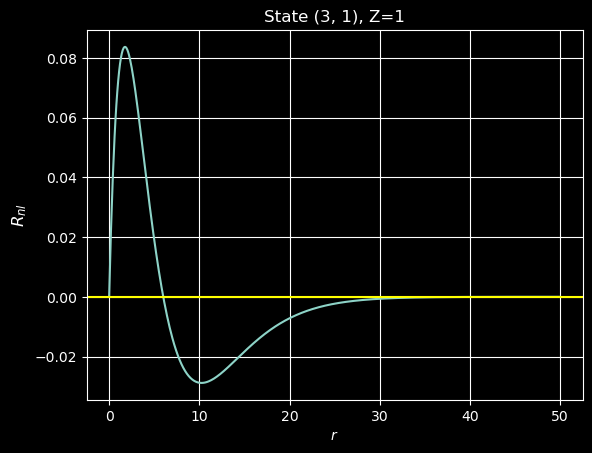

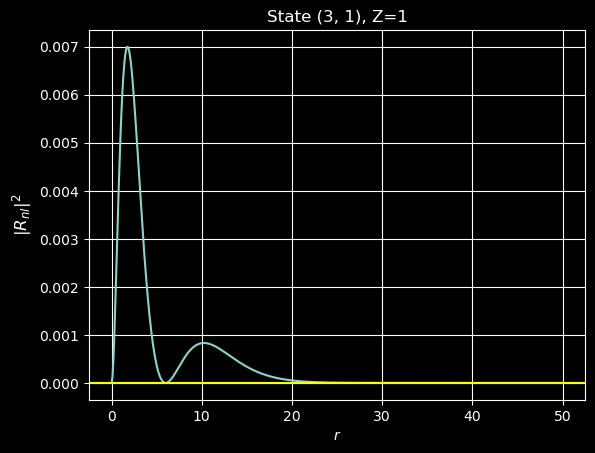

In [7]:
N1 = 500
rmax = 50
Z1 = 1
n1, l1, m1 = 3, 1, -1

r1 = np.linspace(0, rmax, N1)
theta1 = np.linspace(0, np.pi, N1)
phi1 = np.linspace(0, 2*np.pi, N1)
hydrogen_wavefn_all(Z1, n1,l1,m1,r1,theta1,phi1, Psi_nlm=True,Psi_nlm2=True,R_nl=True,R_nl2=True)

## Working with Functions

Main Function: **`hydrogen_wavefn_return(Z, n,l,m)`**

Returns:
1. $E_n \, \implies \,$ `np.array([E, E in J, E in eV])`
2. $\psi_{nlm}(r, \theta, \phi) \, \implies \,$  **`phi_nlm_fn(r, theta, phi)`**
3. $R_{nl}(r) \, \implies \,$  **`R_nl_fn(r)`**

In [8]:
Z1, n1, l1, m1 = 1, 2, 1, -1   # INPUT
En, psi_nlm_fn, R_nl_fn = hydrogen_wavefn_return(Z1, n1,l1,m1)
display(En, psi_nlm_fn, R_nl_fn)

array([-1/8, -5.44968042500000e-19, -3.40142325250000], dtype=object)

<function _lambdifygenerated(r, phi, theta)>

<function _lambdifygenerated(r)>

### $\psi_{nlm}(r, \theta, \phi)$ in **`plotly`**

In [9]:
import plotly.graph_objects as go

In [10]:
N3 = 200
r3 = np.linspace(0, n1*12, N3)  # input
phi3 = np.linspace(0, 2*np.pi, N3)
R2, Phi2 = np.meshgrid(r3, phi3)
theta_const = 0.5  # input
Theta2 = np.full_like(R2, theta_const)
psinlmplotly = psi_nlm_fn(R2, Theta2, Phi2)

fig1 = go.Figure(data=[go.Surface(z=np.abs(psinlmplotly)**2, 
            x=R2*np.cos(Phi2), y=R2*np.sin(Phi2), colorscale='turbo')])
fig1.update_layout(scene=dict(
                xaxis_title='r cos(phi)',
                yaxis_title='r sin(phi)',
                zaxis_title='|psi_nlm|^2'),
                title=f'State {n1,l1,m1}')
fig1.show()

In [11]:
N4 = 30
r4 = np.linspace(0, n1*12, N4)*0.5e-10  # input
theta4 = np.linspace(0, np.pi, N4)
phi4 = np.linspace(0, 2*np.pi, N4)
R3, Theta3, Phi3 = np.meshgrid(r4, theta4, phi4, indexing='ij')
psi2nlmplotly = np.abs(psi_nlm_fn(R3, Theta3, Phi3))**2
X3, Y3 = R3*np.sin(Theta3)*np.cos(Phi3), R3*np.sin(Theta3)*np.sin(Phi3)
Z3 = R3*np.cos(Theta3)

isovalue = np.abs(psi2nlmplotly).max() *0.5
fig2 = go.Figure(data=go.Isosurface(
    x = X3.flatten(),
    y = Y3.flatten(),
    z = Z3.flatten(),
    value = psi2nlmplotly.flatten(),
    isomin=0,
    isomax=isovalue,
    opacity = 0.7, # CHANGE
    surface_count=2,
    colorscale='plasma' ))

fig2.update_layout(
                title=f'State {n1,l1,m1}, Energy={En[2]:.4f}eV',
                scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z'))
fig2.show()

In [12]:
display(psi2nlmplotly.flatten().shape, Z3.flatten().shape)

(27000,)

(27000,)

### All $R_{nl}(r)$ plots for a particular $n$

normalization: 0.9999996998501773


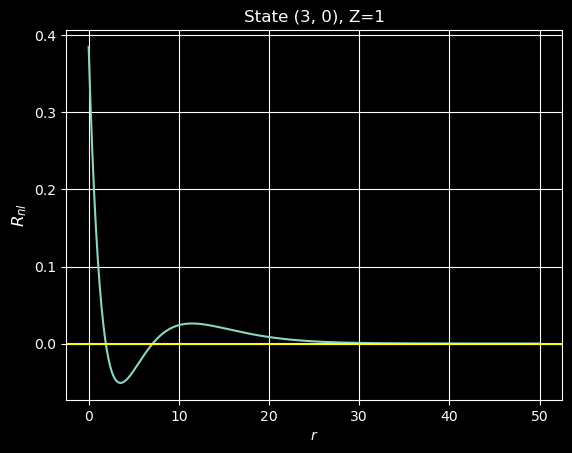

normalization: 0.9999999707874477


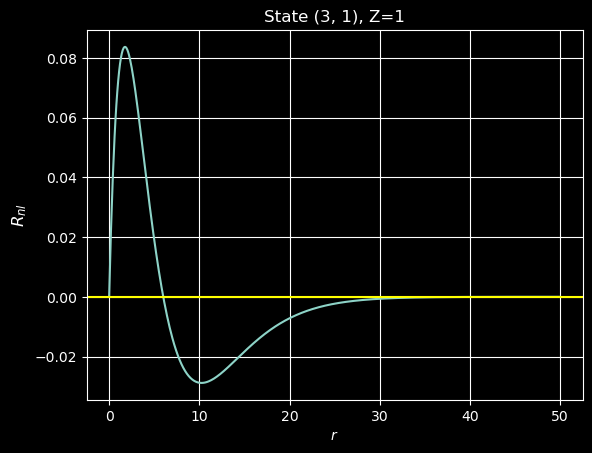

normalization: 0.999999992511386


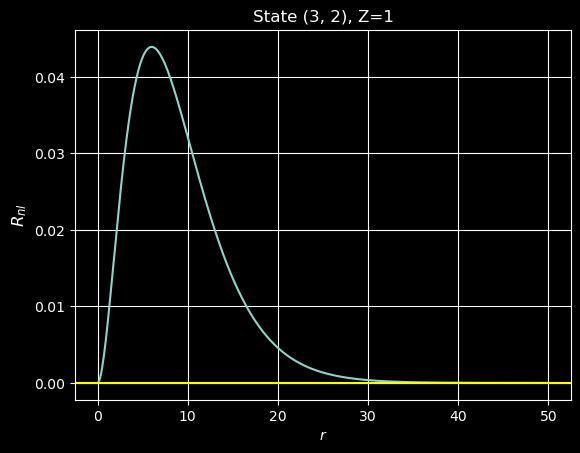

In [13]:
Z2, n2 = 1, 3
rmax2, N2 = (n2+2)*10, 500
r2 = np.linspace(0, rmax2, N2)
Rnl_all = list(np.zeros(n2))
for l2 in range(n2):
    En2, psinlm2, Rnl_all[l2] = hydrogen_wavefn_return(Z2,n2,l2,0)
    Rnl_plot = np.array(Rnl_all[l2](r2))
    print(f'normalization: {np.sum(Rnl_plot**2*r2**2*(r2[1]-r2[0]))}')
    plt.plot(r2, Rnl_plot)
    plt.axhline(0, color='yellow')
    plt.xlabel('$r$')
    plt.ylabel('$R_{nl}$', fontsize=12)
    plt.title(f'State {n2, l2}, Z={Z2}')
    plt.grid()
    plt.show()


## Effects of n, l and m

### Variation of $n$ keeping $l$ and $m$ constant


	 Inputs: 	 n=1, l=0, m=0, 	 Z=1 

E = -1/2 in Hartree atomic units = -2.17987217000000E-18 J = -13.6056930100000 eV


\psi_{nlm}

Z**(3/2)*exp(-Z*r)/sqrt(pi)

Z**(3/2)*exp(-Z*r)/sqrt(pi)

normalization: 1


R_{nl}

2*Z**(3/2)*exp(-Z*r)

2*Z**(3/2)*exp(-Z*r)

normalization: 0.9999999999999999


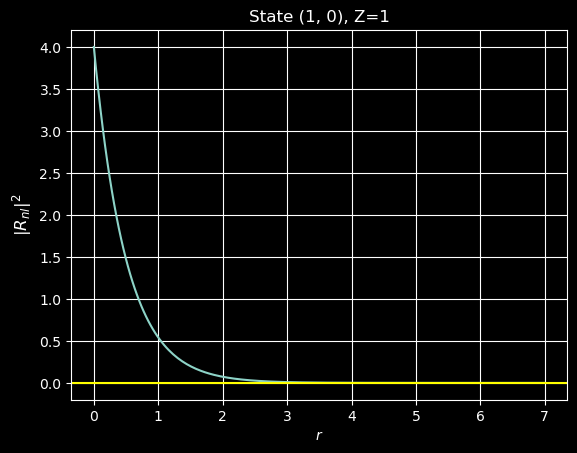

None



	 Inputs: 	 n=2, l=0, m=0, 	 Z=1 

E = -1/8 in Hartree atomic units = -5.44968042500000E-19 J = -3.40142325250000 eV


\psi_{nlm}

sqrt(2)*Z**(3/2)*(-Z*r + 2)*exp(-Z*r/2)/(8*sqrt(pi))

sqrt(2)*Z**(3/2)*(-Z*r + 2)*exp(-Z*r/2)/(8*sqrt(pi))

normalization: 1


R_{nl}

sqrt(2)*Z**(3/2)*(-Z*r + 2)*exp(-Z*r/2)/4

sqrt(2)*Z**(3/2)*(-Z*r + 2)*exp(-Z*r/2)/4

normalization: 1.0


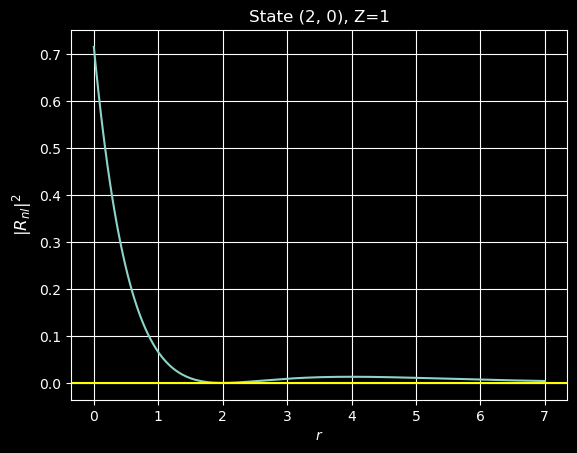

None



	 Inputs: 	 n=3, l=0, m=0, 	 Z=1 

E = -1/18 in Hartree atomic units = -2.42208018888889E-19 J = -1.51174366777778 eV


\psi_{nlm}

sqrt(3)*Z**(3/2)*(2*Z**2*r**2/9 - 2*Z*r + 3)*exp(-Z*r/3)/(27*sqrt(pi))

sqrt(3)*Z**(3/2)*(2*Z**2*r**2 - 18*Z*r + 27)*exp(-Z*r/3)/(243*sqrt(pi))

normalization: 1


R_{nl}

2*sqrt(3)*Z**(3/2)*(2*Z**2*r**2/9 - 2*Z*r + 3)*exp(-Z*r/3)/27

2*sqrt(3)*Z**(3/2)*(2*Z**2*r**2 - 18*Z*r + 27)*exp(-Z*r/3)/243

normalization: 1.0


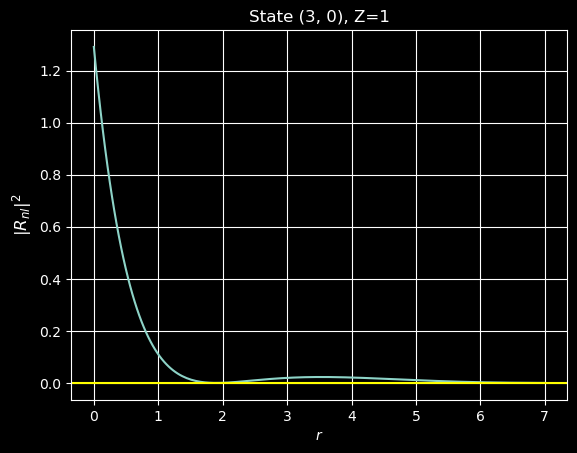

None



	 Inputs: 	 n=4, l=0, m=0, 	 Z=1 

E = -1/32 in Hartree atomic units = -1.36242010625000E-19 J = -0.850355813125000 eV


\psi_{nlm}

Z**(3/2)*(-Z**3*r**3/48 + Z**2*r**2/2 - 3*Z*r + 4)*exp(-Z*r/4)/(32*sqrt(pi))

Z**(3/2)*(-Z**3*r**3 + 24*Z**2*r**2 - 144*Z*r + 192)*exp(-Z*r/4)/(1536*sqrt(pi))

normalization: 1


R_{nl}

Z**(3/2)*(-Z**3*r**3/48 + Z**2*r**2/2 - 3*Z*r + 4)*exp(-Z*r/4)/16

Z**(3/2)*(-Z**3*r**3 + 24*Z**2*r**2 - 144*Z*r + 192)*exp(-Z*r/4)/768

normalization: 1.0


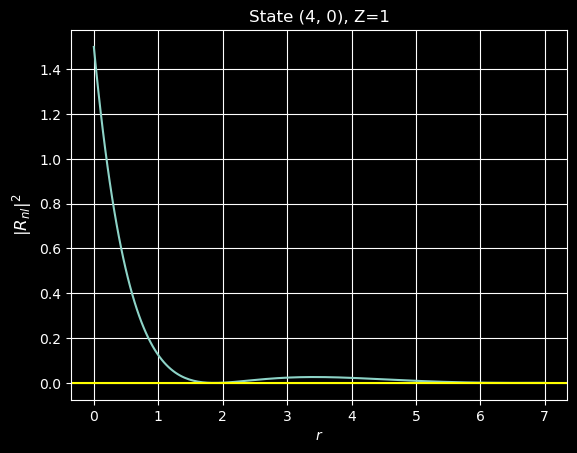

None

In [14]:
N3 = 200
Z3 = 1
n_min, n_max, l3, m3 = 1, 4, 0, 0
# rmax3 = np.arange(n_min, n_max+1)*4
rmax3 = np.ones((n_max-n_min+1,))*7

rarr = [np.linspace(0, rmaxs, N3) for rmaxs in rmax3]
theta3 = np.linspace(0, np.pi, N3)
phi3 = np.linspace(0, 2*np.pi, N3)

cnt = 0
for ns in range(n_min, n_max+1):
    r3 = rarr[cnt]
    cnt += 1
    display(hydrogen_wavefn_all(Z3, ns, l3, m3, r3, theta3,phi3, 
                    Psi_nlm=False, Psi_nlm2=False, R_nl=False, R_nl2=True))
    print('')

### Variation of $l$ keeping $n$ and $m$ constant
Same thing is done in the [All $R_{nl}(r)$ plots for a particular $n$ section](#all-plots-for-a-particular) using the returned function.


	 Inputs: 	 n=3, l=0, m=0, 	 Z=1 

E = -1/18 in Hartree atomic units = -2.42208018888889E-19 J = -1.51174366777778 eV


\psi_{nlm}

sqrt(3)*Z**(3/2)*(2*Z**2*r**2/9 - 2*Z*r + 3)*exp(-Z*r/3)/(27*sqrt(pi))

sqrt(3)*Z**(3/2)*(2*Z**2*r**2 - 18*Z*r + 27)*exp(-Z*r/3)/(243*sqrt(pi))

normalization: 1


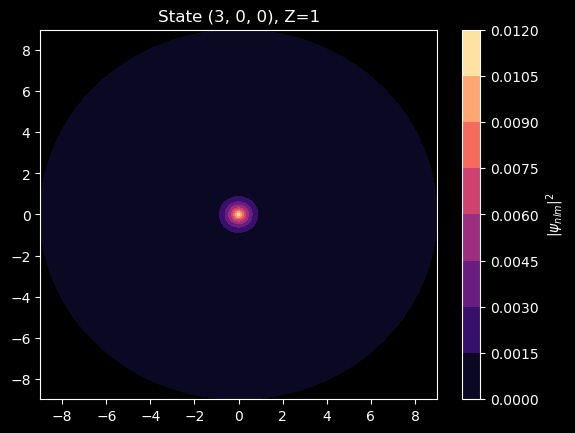

R_{nl}

2*sqrt(3)*Z**(3/2)*(2*Z**2*r**2/9 - 2*Z*r + 3)*exp(-Z*r/3)/27

2*sqrt(3)*Z**(3/2)*(2*Z**2*r**2 - 18*Z*r + 27)*exp(-Z*r/3)/243

normalization: 1.0


None



	 Inputs: 	 n=3, l=1, m=0, 	 Z=1 

E = -1/18 in Hartree atomic units = -2.42208018888889E-19 J = -1.51174366777778 eV


\psi_{nlm}

sqrt(2)*Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-Z*r/3)*cos(theta)/(54*sqrt(pi))

sqrt(2)*Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3)*cos(theta)/(81*sqrt(pi))

normalization: 1


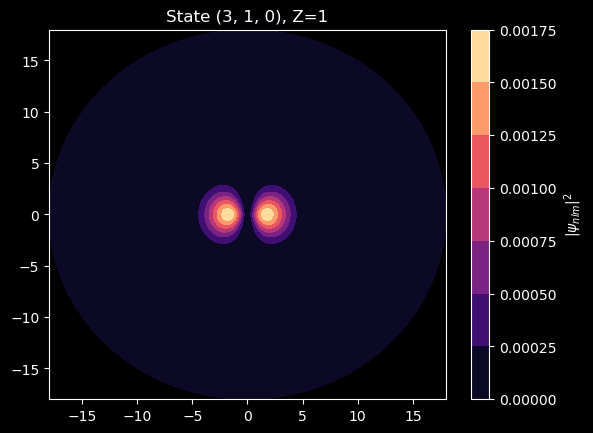

R_{nl}

sqrt(6)*Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-Z*r/3)/81

2*sqrt(6)*Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3)/243

normalization: 1.0


None



	 Inputs: 	 n=3, l=2, m=0, 	 Z=1 

E = -1/18 in Hartree atomic units = -2.42208018888889E-19 J = -1.51174366777778 eV


\psi_{nlm}

2*sqrt(30)*Z**(7/2)*r**2*(3*sqrt(5)*cos(theta)**2/(4*sqrt(pi)) - sqrt(5)/(4*sqrt(pi)))*exp(-Z*r/3)/1215

sqrt(6)*Z**(7/2)*r**2*(3*cos(theta)**2 - 1)*exp(-Z*r/3)/(486*sqrt(pi))

normalization: 1


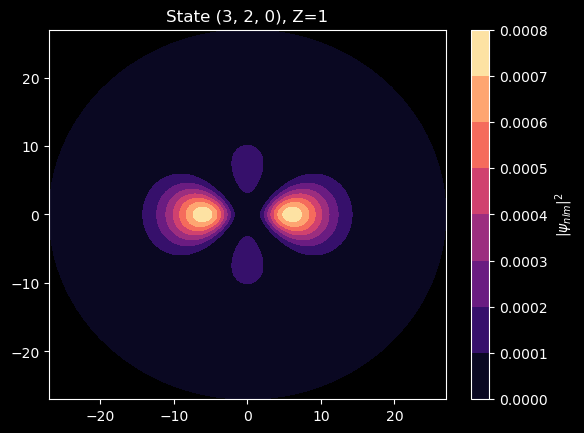

R_{nl}

2*sqrt(30)*Z**(7/2)*r**2*exp(-Z*r/3)/1215

2*sqrt(30)*Z**(7/2)*r**2*exp(-Z*r/3)/1215

normalization: 0.9999999999999999


None

In [15]:
N3 = 100
Z3 = 1
n3, m3 = 3, 0
rmax3 = np.arange(1, n3+1)*n3*3
# rmax3 = np.ones((n3,))*n3*4

rarr = [np.linspace(0, rmaxs, N3) for rmaxs in rmax3]
theta3 = np.linspace(0, np.pi, N3)
phi3 = np.linspace(0, 2*np.pi, N3)

cnt = 0
for ls in range(0, n3):
    r3 = rarr[cnt]
    cnt += 1
    display(hydrogen_wavefn_all(Z3, n3, ls, m3, r3, theta3,phi3, 
                    Psi_nlm=False, Psi_nlm2=True, R_nl=False, R_nl2=False))
    print('')

### Variation of $m$ keeping $n$ and $l$ constant

In [16]:
N3 = 200
Z3 = 1
n3, l3 = 3, 1
# rmax3 = np.arange(-l3, l3+1)*n3*4
rmax3 = np.ones((2*l3 +1,))*7*n3

rarr = [np.linspace(0, rmaxs, N3) for rmaxs in rmax3]
theta3 = np.linspace(0, np.pi, N3)
phi3 = np.linspace(0, 2*np.pi, N3)

cnt = 0
for ms in range(-l3, l3 +1, 1):
    r3 = rarr[cnt]
    cnt += 1
    display(hydrogen_wavefn_all(Z3, n3, l3, ms, r3, theta3,phi3, 
                    Psi_nlm=False, Psi_nlm2=False, R_nl=False, R_nl2=False))
    print('')


	 Inputs: 	 n=3, l=1, m=-1, 	 Z=1 

E = -1/18 in Hartree atomic units = -2.42208018888889E-19 J = -1.51174366777778 eV


\psi_{nlm}

Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-I*phi)*exp(-Z*r/3)*sin(theta)/(54*sqrt(pi))

Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3 - I*phi)*sin(theta)/(81*sqrt(pi))

normalization: 1


R_{nl}

sqrt(6)*Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-Z*r/3)/81

2*sqrt(6)*Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3)/243

normalization: 1.0000000000000004


None



	 Inputs: 	 n=3, l=1, m=0, 	 Z=1 

E = -1/18 in Hartree atomic units = -2.42208018888889E-19 J = -1.51174366777778 eV


\psi_{nlm}

sqrt(2)*Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-Z*r/3)*cos(theta)/(54*sqrt(pi))

sqrt(2)*Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3)*cos(theta)/(81*sqrt(pi))

normalization: 1


R_{nl}

sqrt(6)*Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-Z*r/3)/81

2*sqrt(6)*Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3)/243

normalization: 1.0000000000000004


None



	 Inputs: 	 n=3, l=1, m=1, 	 Z=1 

E = -1/18 in Hartree atomic units = -2.42208018888889E-19 J = -1.51174366777778 eV


\psi_{nlm}

-Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(I*phi)*exp(-Z*r/3)*sin(theta)/(54*sqrt(pi))

Z**(5/2)*r*(Z*r - 6)*exp(-Z*r/3 + I*phi)*sin(theta)/(81*sqrt(pi))

normalization: 1


R_{nl}

sqrt(6)*Z**(5/2)*r*(-2*Z*r/3 + 4)*exp(-Z*r/3)/81

2*sqrt(6)*Z**(5/2)*r*(-Z*r + 6)*exp(-Z*r/3)/243

normalization: 1.0000000000000004


None

yz and zx plane

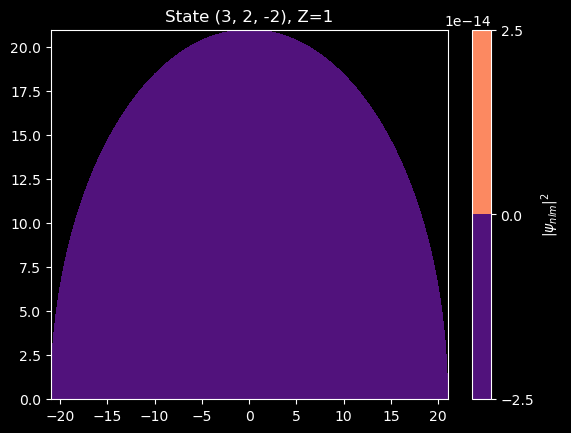

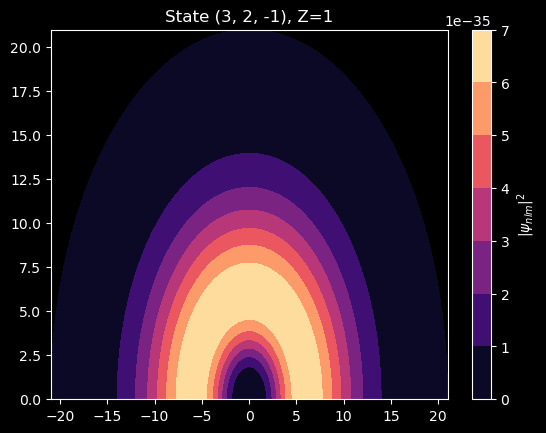

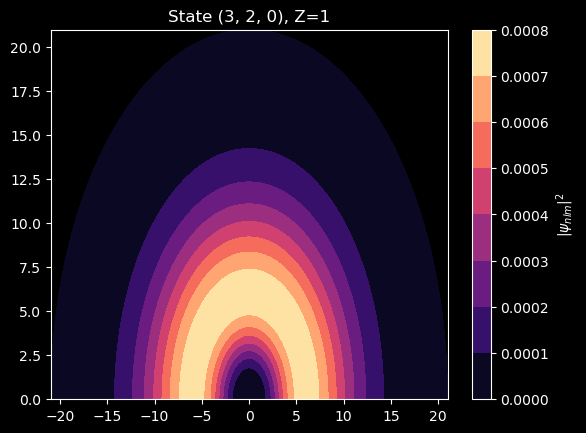

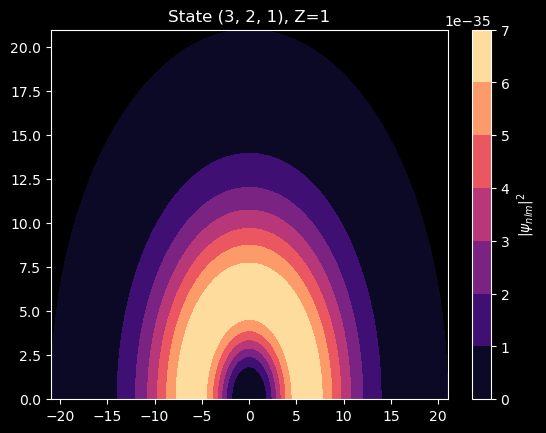

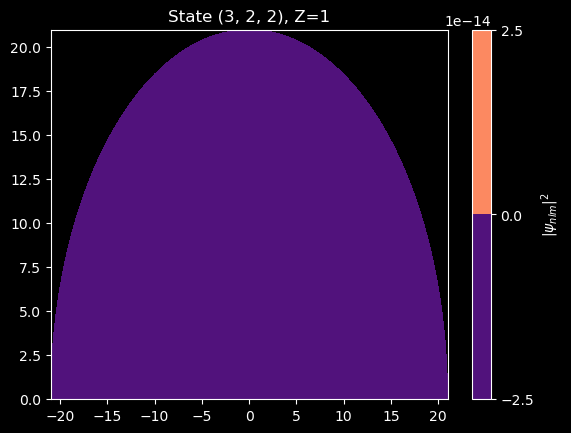

In [17]:
N3 = 200
Z3 = 1
n3, l3 = 3, 2
# rmax3 = np.arange(-l3, l3+1)*n3*4
rmax3 = np.ones((2*l3 +1,))*7*n3

rarr = [np.linspace(0, rmaxs, N3) for rmaxs in rmax3]
# r3 = np.linspace(0, 20, N3)
theta3 = np.linspace(0, np.pi, N3)
phi3 = np.linspace(0, 0.25*np.pi, N3)


cnt = 0
for ms in range(-l3, l3 +1, 1):
    r3 = rarr[cnt]
    cnt += 1
    R2, Theta2 = np.meshgrid(r3, theta3)
    Phi2 = np.full_like(R2, 2*np.pi)  # input
    En, psi_nlm_fn, R_nl_fn = hydrogen_wavefn_return(Z3, n3, l3, ms)
    psiarr2 = psi_nlm_fn(R2, Theta2, Phi2)
    plt.contourf(R2*np.cos(Theta2), R2*np.sin(Theta2), np.abs(psiarr2)**2, cmap='magma')
    plt.colorbar(label='$|\psi_{nlm}|^2$')
    plt.title(f'State {n3, l3, ms}, Z={Z3}')
    plt.show()
# plt.contourf(R2*np.cos(Phi2), R2*np.sin(Phi2), np.abs(psiarr2)**2, cmap='magma')
# # plt.title(f'State {n, l, m}, Z={Z}')
# plt.show()

## Time independent perturbation theory
I'm not sure about the calculations in this section.

In [23]:
from scipy.integrate import tplquad

array([-1/2, -2.17987217000000e-18, -13.6056930100000], dtype=object)

<function _lambdifygenerated(r, phi, theta)>

<function _lambdifygenerated(r)>

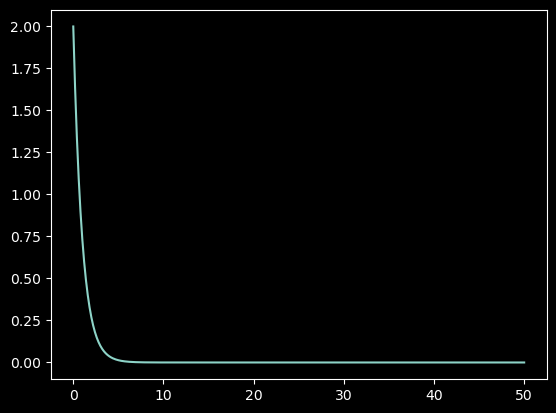

Energy = 2.3317790086306973e-06


In [46]:
Z1, n1, l1, m1 = 1, 1,0,0     # INPUT
En, psi_nlm_fn, R_nl_fn = hydrogen_wavefn_return(Z1, n1,l1,m1)
display(En, psi_nlm_fn, R_nl_fn)

N1 = 500
rmax = 50
Z1 = 1
n1, l1, m1 = 3, 1, -1
r1 = np.linspace(0, rmax, N1)
theta1 = np.linspace(0, np.pi, N1)
phi1 = np.linspace(0, 2*np.pi, N1)
psinlm, Rnl = psi_nlm_fn(r1, phi1, theta1), R_nl_fn(r1)
plt.plot(r1, Rnl)
plt.show()

H_per = 2*r1*np.cos(theta1)
intg = np.conjugate(psinlm)*H_per*psinlm
dr1, dphi1, dtheta1 = (r1[1]-r1[0]), (phi1[1]-phi1[0]), (theta1[1]-theta1[0])
E_per = np.sum(intg*r1**2*np.sin(theta1)*dr1*dphi1*dtheta1)
print(f'Energy = {E_per}')

In [38]:
# E_per, E_per_err = tplquad(np.conjugate(psinlm)*H_per*psinlm*r1**2*np.sin(theta1), 0,rmax, 0,2*np.pi, 0,np.pi)